<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# 📝  Project1

In [2]:
import pandas as pd
import numpy as np
import re
from google.colab import files
import io
import matplotlib.pyplot as plt 
import random
import seaborn as sns

In [4]:
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [5]:
df = pd.read_csv('vgames2.csv',index_col=0)

In [12]:
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

1. **지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.**
2. **연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.**
3. **출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.**


## **전처리**

---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


###**발견된 문제 **
1. `Platform` 에서 지원 플랫폼 명이 숫자인 데이터가 존재한다.
  
  -> 행을 모두 **제거한다.**
2. `Year` 에서 데이터가 N/A 인 데이터가 존재한다.
 
  -> 문자열인 듯 하였으나 다른 문제로 인해 문자열처럼 출력되는 현상이었다. **제거한다**.
3. `Year` 에서 연도숫자의 범위가 아닌 데이터가 존재한다. 
  
  -> 1950년 ~ 2050년 범위 이외의 데이터는 모두 **제거한다. **

  -> 자료형을 int로 교체한다.

4. `Genre, Publisher`가 공백인 데이터가 존재한다.

  -> 데이터를 모두 **제거한다.**

5. `Publisher` 이름이 숫자형인 데이터가 존재한다. 

  -> 이름이 숫자만 있는 행은 **제거한다.**

6. `Sales` 데이터들에서 K,M 등 값들의 단위가 중구난방이다.

  -> 모든 단위를 M 단위로 **통일한다**. 단위 표시가 없는 값은 모두 M으로 가정한다.

  -> 480K는 0.48 로 나타낸다. 4100K는 4.1 로 나타낸다.

  -> 숫자에 M,K가 붙은 경우 떼버린다.

  -> 자료형을 float로 교체한다.

7. 기종이 없이 밀려적혀 결측값이 존재하는 값이 존재한다.

  -> 제거한다.

**1.** Platform 에서 지원 플랫폼 명이 숫자인 데이터가 존재한다.

In [7]:
DF = df.copy() # 원본 데이터 수정 방지

In [8]:
NotPlatform = df[~df['Platform'].str.contains(r'[A-Za-z]')].index # 알파벳을 포함하지 않는 데이터 제거

In [9]:
DF = DF.drop(NotPlatform).reset_index(drop = True)

**2.** Year 에서 데이터가 N/A 인 데이터가 존재한다. 

**3.** 연도숫자의 범위가 아닌 데이터가 존재한다.

In [10]:
valid_Year = "Year>1950 & Year<2050"
DF = DF.query(valid_Year)

In [11]:
DF.Year = DF.Year.astype('int')  # int형으로 변경

**4.** 장르,퍼블리셔가 공백인 데이터가 존재한다.

In [12]:
DF.isnull().sum()

Name            0
Platform        0
Year            0
Genre          49
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [13]:
DF = DF.dropna()


In [14]:
DF = DF.reset_index()

**5.** `Publisher` 이름이 숫자형인 데이터가 존재한다. 

In [15]:
NotPub = DF[~DF['Publisher'].str.contains(r'[A-Za-z]')].index # 알파벳을 포함하지 않는 데이터 제거

In [16]:
NotPub # 없으니 pass 중간에 제거된듯

Int64Index([], dtype='int64')

In [17]:
DF.info() # 현재 상황

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16026 entries, 0 to 16025
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        16026 non-null  int64 
 1   Name         16026 non-null  object
 2   Platform     16026 non-null  object
 3   Year         16026 non-null  int64 
 4   Genre        16026 non-null  object
 5   Publisher    16026 non-null  object
 6   NA_Sales     16026 non-null  object
 7   EU_Sales     16026 non-null  object
 8   JP_Sales     16026 non-null  object
 9   Other_Sales  16026 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.2+ MB


6.`Sales` 데이터들에서 K,M 등 값들의 단위가 중구난방이다.

-> 모든 단위를 M 단위로 통일한다.

-> 480K는 0.48 로 나타낸다. 4100K는 4.1 로 나타낸다.

-> 숫자에 M,K가 붙은 경우 떼버린다.

-> 자료형을 float로 교체한다.

In [39]:
def gett_value(DF,Sales):
  if DF[DF['Sales'].str.contains('K')]:
    DF = DF[DF['Sales'].str.replace('K','').astype('float')]
  return DF/1000

In [57]:
# file export
file_name = 'sample1.csv'
# saving the excelsheet
DF.to_csv(file_name, index=False)

In [4]:
uploaded = files.upload()

Saving sample3.csv to sample3.csv


In [5]:
DF = pd.read_csv('sample3.csv',index_col=0)

**7.** 결측치 제거

In [6]:
DF['Other_Sales'][DF['Other_Sales'].isnull()]

index
7531    NaN
16064   NaN
Name: Other_Sales, dtype: float64

In [7]:
DF = DF.dropna().reset_index(drop=True)

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16024 entries, 0 to 16023
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16024 non-null  object 
 1   Platform     16024 non-null  object 
 2   Year         16024 non-null  object 
 3   Genre        16024 non-null  object 
 4   Publisher    16024 non-null  object 
 5   NA_Sales     16024 non-null  float64
 6   EU_Sales     16024 non-null  float64
 7   JP_Sales     16024 non-null  float64
 8   Other_Sales  16024 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [10]:
DF

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16019,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16020,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16021,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16022,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## **1. 지역에 따라서 선호하는 게임 장르가 다를까?**

In [16]:
DF.Genre.value_counts(normalize=True) # 총 게임 갯수에서 각 장르의 비율

Action          0.197891
Sports          0.142287
Misc            0.103969
Role-Playing    0.090926
Adventure       0.078694
Shooter         0.077758
Racing          0.075200
Platform        0.053420
Simulation      0.052421
Fighting        0.051672
Strategy        0.041438
Puzzle          0.034324
Name: Genre, dtype: float64

In [18]:
DF.Genre.value_counts() #총 게임에서 각 장르의 갯수

Action          3171
Sports          2280
Misc            1666
Role-Playing    1457
Adventure       1261
Shooter         1246
Racing          1205
Platform         856
Simulation       840
Fighting         828
Strategy         664
Puzzle           550
Name: Genre, dtype: int64

In [19]:
DF.groupby('Genre')['NA_Sales'].sum()

Genre
Action          831.33
Adventure       100.95
Fighting        219.39
Misc            390.95
Platform        430.08
Puzzle          108.28
Racing          351.39
Role-Playing    307.08
Shooter         549.48
Simulation      180.62
Sports          662.19
Strategy         67.82
Name: NA_Sales, dtype: float64

In [74]:
NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
NA_ratio = NA_ratio.sort_values(ascending=False)

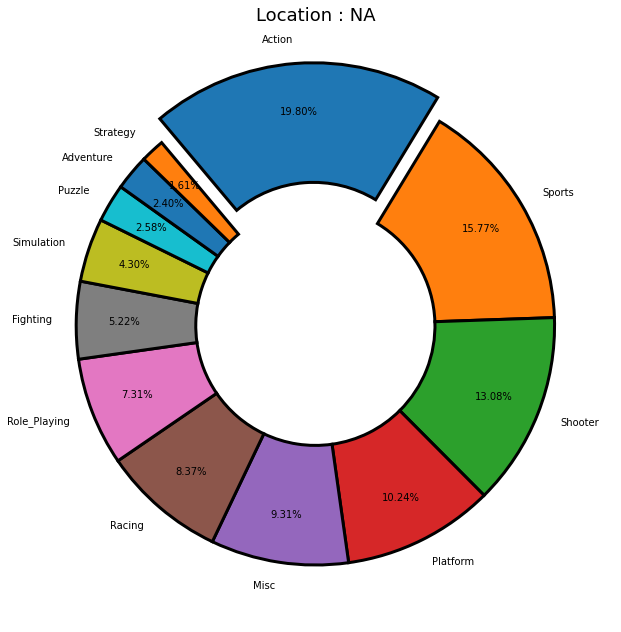

In [75]:
Action = NA_ratio.iloc[0]
Sports = NA_ratio.iloc[1]
Shooter = NA_ratio.iloc[2]
Platform = NA_ratio.iloc[3]
Misc = NA_ratio.iloc[4]
Racing = NA_ratio.iloc[5]
Role_Playing = NA_ratio.iloc[6]
Fighting = NA_ratio.iloc[7]
Simulation = NA_ratio.iloc[8]
Puzzle = NA_ratio.iloc[9]
Adventure = NA_ratio.iloc[10]
Strategy = NA_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Platform,Misc,Racing,Role_Playing,
         Fighting,Simulation,Puzzle,Adventure,Strategy]
labels = ['Action','Sports','Shooter','Platform','Misc','Racing','Role_Playing',
         'Fighting','Simulation','Puzzle','Adventure','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : NA", fontsize=18)

plt.show()


In [77]:
EU_ratio = DF.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)

In [81]:
EU_ratio

Genre
Action          561.00
Sports          369.57
Shooter         305.95
Racing          234.07
Misc            207.30
Platform        198.68
Role-Playing    176.31
Simulation      112.66
Fighting         99.68
Adventure        63.30
Puzzle           49.59
Strategy         44.70
Name: EU_Sales, dtype: float64

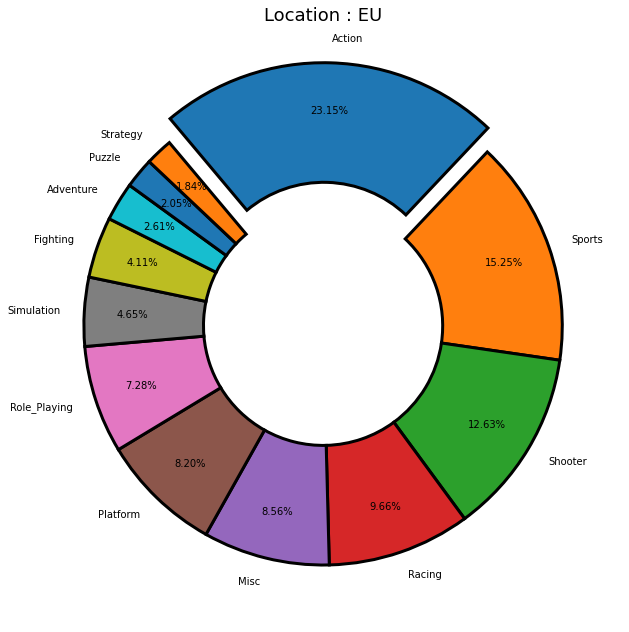

In [85]:
Action = EU_ratio.iloc[0]
Sports = EU_ratio.iloc[1]
Shooter = EU_ratio.iloc[2]
Racing = EU_ratio.iloc[3]
Misc = EU_ratio.iloc[4]
Platform = EU_ratio.iloc[5]
Role_Playing = EU_ratio.iloc[6]
Simulation = EU_ratio.iloc[7]
Fighting = EU_ratio.iloc[8]
Adventure = EU_ratio.iloc[9]
Puzzle = EU_ratio.iloc[10]
Strategy = EU_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Racing,Misc,Platform,Role_Playing,
         Simulation,Fighting,Adventure,Puzzle,Strategy]
labels = ['Action','Sports','Shooter','Racing','Misc','Platform','Role_Playing',
         'Simulation','Fighting','Adventure','Puzzle','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : EU", fontsize=18)

plt.show()

In [ ]:
NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
NA_ratio = NA_ratio.sort_values(ascending=False)

In [79]:
JP_ratio = DF.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

In [86]:
JP_ratio

Genre
Role-Playing    336.25
Action          167.61
Sports          134.58
Platform        129.22
Misc            103.71
Fighting         86.39
Simulation       63.46
Puzzle           56.19
Racing           55.42
Adventure        51.67
Strategy         48.13
Shooter          37.34
Name: JP_Sales, dtype: float64

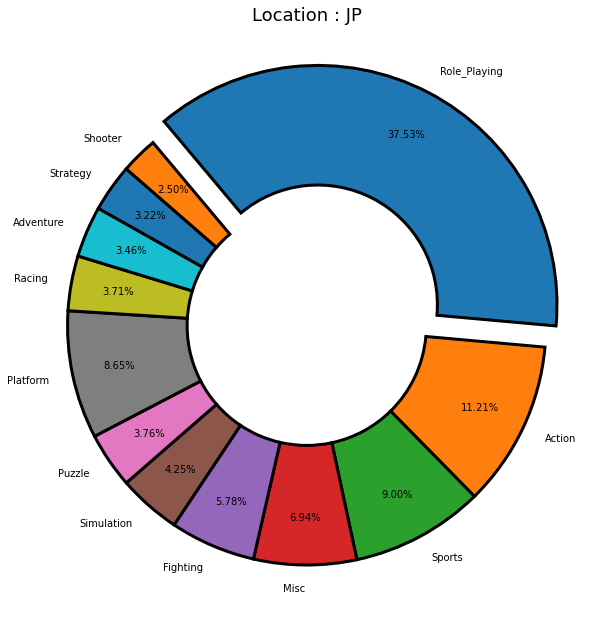

In [95]:
Role_Playing = JP_ratio.iloc[0]
Action = JP_ratio.iloc[1]
Sports = JP_ratio.iloc[2]
Platform = JP_ratio.iloc[3]
Misc = JP_ratio.iloc[4]
Fighting = JP_ratio.iloc[5]
Simulation = JP_ratio.iloc[6]
Puzzle = JP_ratio.iloc[7]
Racing = JP_ratio.iloc[8]
Adventure = JP_ratio.iloc[9]
Strategy = JP_ratio.iloc[10]
Shooter = JP_ratio.iloc[11]

ratio = [Role_Playing,Action,Sports,Misc,Fighting,Simulation,Puzzle,Platform,
         Racing,Adventure,Strategy,Shooter]
labels = ['Role_Playing','Action','Sports','Misc','Fighting','Simulation',
          'Puzzle','Platform',
         'Racing','Adventure','Strategy','Shooter']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : JP", fontsize=18)

plt.show()

In [80]:
Other_ratio = DF.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)

In [91]:
Other_ratio

Genre
Action          183.43
Sports          131.71
Shooter         100.58
Racing           76.22
Misc             72.51
Role-Playing     54.71
Platform         50.99
Simulation       41.23
Fighting         36.09
Adventure        16.64
Puzzle           12.24
Strategy         11.20
Name: Other_Sales, dtype: float64

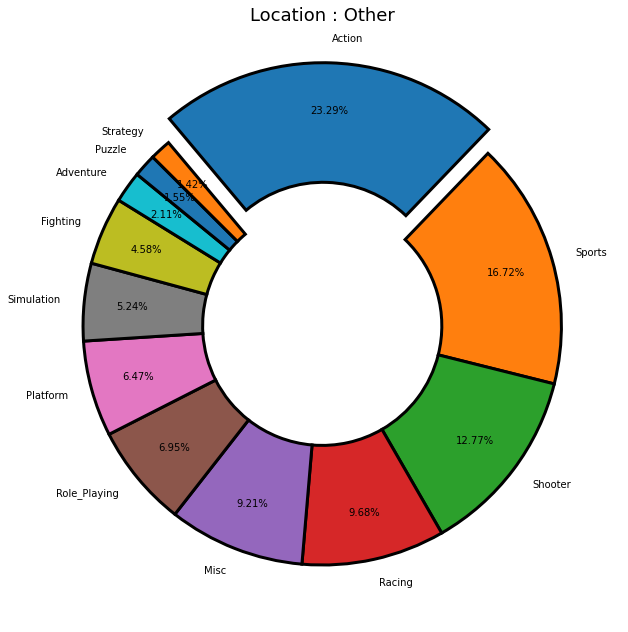

In [94]:
Action = Other_ratio.iloc[0]
Sports = Other_ratio.iloc[1]
Shooter = Other_ratio.iloc[2]
Racing = Other_ratio.iloc[3]
Misc = Other_ratio.iloc[4]
Role_Playing = Other_ratio.iloc[5]
Platform = Other_ratio.iloc[6]
Simulation = Other_ratio.iloc[7]
Fighting = Other_ratio.iloc[8]
Adventure = Other_ratio.iloc[9]
Puzzle = Other_ratio.iloc[10]
Strategy = Other_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Racing,Misc,Role_Playing,Platform,Simulation,
Fighting,Adventure,Puzzle,Strategy]
labels = ['Action','Sports','Shooter','Racing','Misc','Role_Playing','Platform',
          'Simulation',
'Fighting','Adventure','Puzzle','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : Other", fontsize=18)

plt.show()

**대부분의 지역에서 액션, 스포츠, 슈팅게임의 판매순위가 높았으나** 

**유독 일본에서만은 롤플레잉 게임이 압도적 강세를 보이며 슈팅게임은 인기가 없는 것으로 나타났다.**

## **2. 연도별 게임의 트렌드가 있을까?**

 ## **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

### **1-1. Dot product**

- Dot product를 이용하여 구매자별 구매 총합을 계산하세요.
  - Data Description
    - People : 구매자
    - Name : 제품명
    - Price : 제품 개당 가격
    - Amount : 제품 구매 갯수

|People|Name|Price|Amount|
|:-:|:-:|:-:|:-:|
|X|A|100|35|
|X|B|500|10|
|X|C|250|25|
|X|D|50|40|
|Y|A|100|-|
|Y|B|500|50|
|Y|C|250|50|
|Y|D|50|-|
|Z|A|100|-|
|Z|B|500|-|
|Z|C|250|100|
|Z|D|50|-|

##### **Q1. Dot product를 통해 구한 구매자 X의 구매 총합을 쓰세요.**

In [ ]:
sp.Matrix(array) # array

Matrix([
[ 1,  0, 2],
[-3,  4, 6],
[-1, -2, 3]])